<a href="https://colab.research.google.com/github/davecorrea/Transformacion_coordenadas/blob/master/analisis_Temp_PISCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descripción**

Análisis preliminar de información de Temperaturas máximas y míninas para la región San Martín a partir de información historica de Re-Análisis de PISCO (SENAMHI), 1981 - 2016.

Procesamiento: David Correa
versión 1.0
Fecha: 25/10/2022
Programación: Python



# **Habilita librerías para análisis de información de Tmax y Tmin**




In [1]:
# Habilita librerías para análisis de información de Tmax y Tmin
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd
import seaborn as sns


# Dirección http de variables PISCO en IRIDL
url_tmax_dia = 'http://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmax/.stable/.daily/.tmax/dods'
url_tmin_dia = 'http://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmin/.stable/.daily/.tmin/dods'
#url_tmax_mes = 'http://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmax/.stable/.monthly/.tmax/dods'
#url_tmin_mes = 'http://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmin/.stable/.monthly/.tmin/dods'

# Accede a las bases de datos de PISCO
ds_tmax_dia =xr.open_dataset(url_tmax_dia, decode_times=False)
ds_tmin_dia =xr.open_dataset(url_tmin_dia, decode_times=False)
#ds_tmax_mes =xr.open_dataset(url_tmax_mes, decode_times=False)
#ds_tmin_mes =xr.open_dataset(url_tmin_mes, decode_times=False)

# Lee las coordenadas de latitud y longitud
lat = ds_tmax_dia.Y;
lon = ds_tmax_dia.X;
#tiempo = ds_tmax_dia.T;
tiempo = pd.date_range("1981-01-01", periods=13149, freq="d")

# Convierte los vectores dimensión a una grilla de coordenadas para mostrar mapas
LON, LAT = np.meshgrid(lon,lat)

print(tiempo)
#plt.figure()
#plt.boxplot(tiempo.week)
               

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=13149, freq='D')


# **Límites del área de estudio**


In [2]:
# Límites del área de estudio (región San Martín)
lomin = -77.75
lomax = -75.5
lamin = -8.75
lamax = -5.5

# Ubica las coordenadas del área de estudio.
plon = np.array([lomin, lomin, lomax, lomax, lomin])
plat = np.array([lamax, lamin, lamin, lamax, lamax])

# Halla los índices del área de estudio dentro de las coordenadas de la grilla
lat_inds = np.array(np.where((lat > lamin) & (lat < lamax)))
lon_inds = np.array(np.where((lon > lomin) & (lon < lomax)))
# Vector de índices de área de interés respecto a la grilla
lat_inds = lat_inds.flatten()
lon_inds = lon_inds.flatten()

# Se muestra las coordenadas del área seleccionada
print(lon[lon_inds])
print(lat[lat_inds])

#print(LON[lat_inds,:][:,lon_inds])
#print(LAT[lat_inds,:][:,lon_inds])

<xarray.DataArray 'X' (X: 22)>
array([-77.65    , -77.549995, -77.45    , -77.35    , -77.25    , -77.15    ,
       -77.049995, -76.95    , -76.85    , -76.75    , -76.65    , -76.549995,
       -76.45    , -76.35    , -76.25    , -76.15    , -76.05    , -75.95    ,
       -75.85    , -75.75    , -75.65    , -75.55    ], dtype=float32)
Coordinates:
  * X        (X) float32 -77.65 -77.55 -77.45 -77.35 ... -75.75 -75.65 -75.55
Attributes:
    long_name:      Longitude
    standard_name:  longitude
    pointwidth:     0.09999996
    gridtype:       0
    units:          degree_east
<xarray.DataArray 'Y' (Y: 32)>
array([-5.55, -5.65, -5.75, -5.85, -5.95, -6.05, -6.15, -6.25, -6.35, -6.45,
       -6.55, -6.65, -6.75, -6.85, -6.95, -7.05, -7.15, -7.25, -7.35, -7.45,
       -7.55, -7.65, -7.75, -7.85, -7.95, -8.05, -8.15, -8.25, -8.35, -8.45,
       -8.55, -8.65], dtype=float32)
Coordinates:
  * Y        (Y) float32 -5.55 -5.65 -5.75 -5.85 ... -8.35 -8.45 -8.55 -8.65
Attributes:
    long_nam

# **Extrae información 2D de Tmax y Tmin**

In [3]:
## Extrae mapa 2D de referencia de tmax y tmin 
# Tmax del día 100 y Tmin del día 200 del área seleccionada
Mtmaxd = ds_tmax_dia['tmax'][99,:,:];
Mtmind = ds_tmin_dia['tmin'][199,:,:];

Text(0.5, 0, 'Latitud [°]')

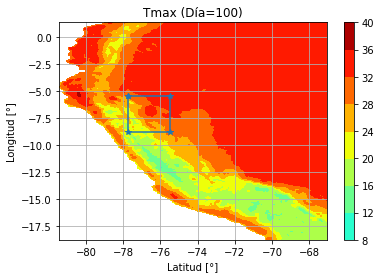

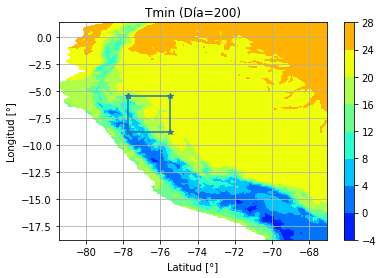

In [4]:
# Visualizar Tmax del día 100 y Tmin del día 200

plt.figure()
plt.title('Tmax (Día=100)')
plt.contourf(LON,LAT,Mtmaxd,cmap = 'jet',vmin = -10, vmax = 40)
plt.colorbar();
plt.grid()
plt.plot(plon,plat,'*-')
plt.ylabel('Longitud [°]')
plt.xlabel('Latitud [°]')


plt.figure()
plt.title('Tmin (Día=200)')
plt.contourf(LON,LAT,Mtmind,cmap = 'jet',vmin = -10, vmax = 40)
plt.colorbar();
plt.grid()
plt.plot(plon,plat,'*-')
plt.ylabel('Longitud [°]')
plt.xlabel('Latitud [°]')



# **Extrae y visualiza series de Tmax y Tmin dentro del área de estudio**

In [5]:
# Extrae la serie de Tmax y Tmin del área de estudio, en tiempo y espacio (T,Y,X)
# Coordenadas de la región San Martín
Latp = -6.51389;
Lonp = -76.7408;

STmaxd = ds_tmax_dia['tmax'][:,76,46]
STmind = ds_tmin_dia['tmin'][:,76,46]

print(LON[76,46])
print(LAT[76,46])

# Convierte la matriz de datos 3D (T,Y,X) a vector de datos (T*Y*X) 
#SeTmaxd  = np.array(STmaxd .to_series())
#SeTmind  = np.array(STmind .to_series())


-76.85
-6.25


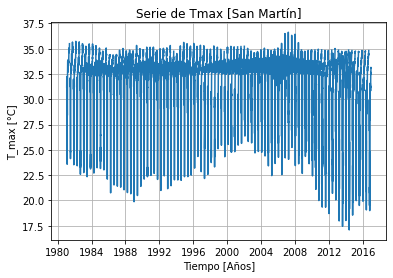

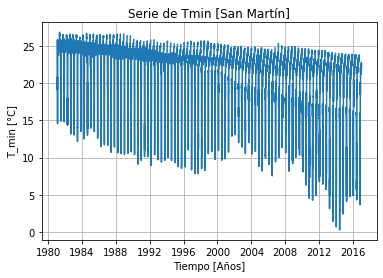

In [6]:
# Visualiza la serie de Tmax y Tmin en una localización dentro del área de estudio
plt.figure()
plt.plot(tiempo,STmaxd)
plt.title('Serie de Tmax [San Martín]')
plt.ylabel('T_max [°C]')
plt.xlabel('Tiempo [Años]')
plt.grid()

plt.figure()
plt.plot(tiempo,STmind)
plt.title('Serie de Tmin [San Martín]')
plt.ylabel('T_min [°C]')
plt.xlabel('Tiempo [Años]')
plt.grid()



Text(0, 0.5, 'Cantidad')

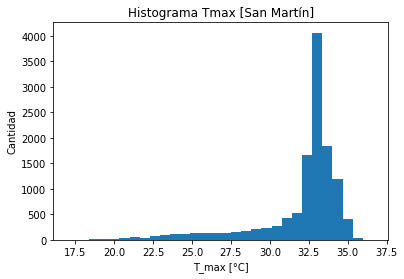

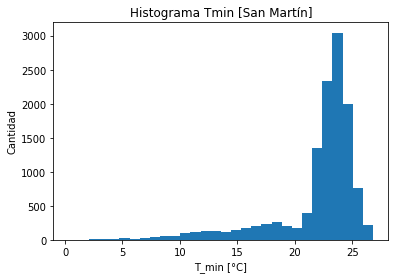

In [7]:

# Visualiza el histograma de Tmax y Tmin en una localización en el área de estudio
plt.figure()
plt.hist(STmaxd,30)
plt.title('Histograma Tmax [San Martín]')
plt.xlabel('T_max [°C]')
plt.ylabel('Cantidad')


plt.figure()
plt.hist(STmind,30)
plt.title('Histograma Tmin [San Martín]')
plt.xlabel('T_min [°C]')
plt.ylabel('Cantidad')


# **Calcula diagramas de cajas e histogramas de Tmax y Tmin**

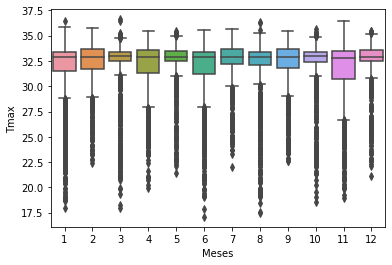

In [8]:
# Se calcula la diagrama de caja de la serie de Tmax y Tmin x meses
STmaxd_data = STmaxd[~np.isnan(STmaxd)]
STmind_data = STmind[~np.isnan(STmind)]
Ntiempo = tiempo[~np.isnan(STmaxd)]

# Se ordena la Tmax y Tmin en una columna y los meses en una columna adicional
dTmax = pd.DataFrame({'Tmax': STmaxd_data,
                   'Meses': np.int64(Ntiempo.month)})
dTmin = pd.DataFrame({'Tmin': STmind_data,
                   'Meses': np.int64(Ntiempo.month)})

# Visualiza el diagrama de cajas de la Tmax x meses del año
plt.figure()
sns.boxplot(y='Tmax', x='Meses', data=dTmax)


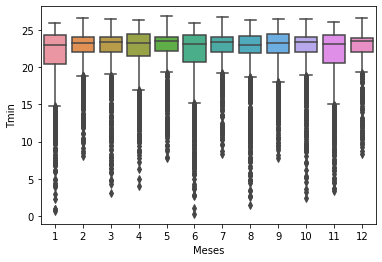

In [9]:

# Visualiza el diagrama de cajas de la Tmin x meses del año
plt.figure()
sns.boxplot(y='Tmin', x='Meses', data=dTmin)

Text(0.5, 0, 'Tmax (°C)')

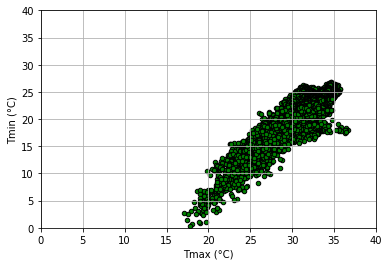

In [10]:
# Correlaciona la Tmax vs Tmin x día
plt.figure()
plt.scatter(STmaxd_data,STmind_data, s=20, facecolor='g', edgecolor='k')
plt.ylim(0, 40)
plt.xlim(0, 40)
plt.grid()
plt.ylabel('Tmin (°C)')
plt.xlabel('Tmax (°C)')


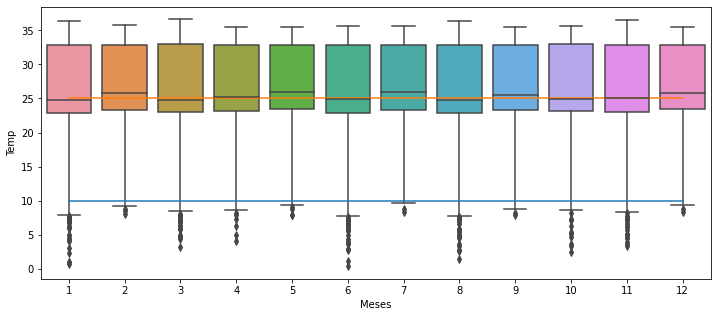

In [11]:

# Visualiza el diagrama de cajas de la Tmax y Tmin juntos x meses del año
a = np.concatenate([STmaxd_data,STmind_data])
b = np.concatenate([np.int64(Ntiempo.month),np.int64(Ntiempo.month)])

dTemp = pd.DataFrame({'Temp': a,
                   'Meses': b})

plt.figure(figsize=(12,5))
sns.boxplot(y='Temp', x='Meses', data=dTemp)
plt.plot(10*np.ones(12))
plt.plot(25*np.ones(12))


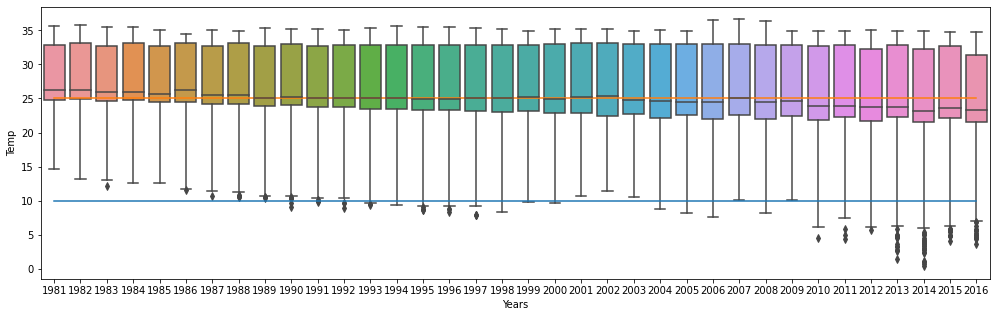

In [12]:
# Visualiza el diagrama de cajas de la Tmax y Tmin juntos x años
a = np.concatenate([STmaxd_data,STmind_data])
b = np.concatenate([np.int64(Ntiempo.year),np.int64(Ntiempo.year)])

dTemp = pd.DataFrame({'Temp': a,
                   'Years': b})


plt.figure(figsize=(17,5))
sns.boxplot(y='Temp', x='Years', data=dTemp)
plt.plot(10*np.ones(36))
plt.plot(25*np.ones(36))




Text(0, 0.5, 'Cantidad')

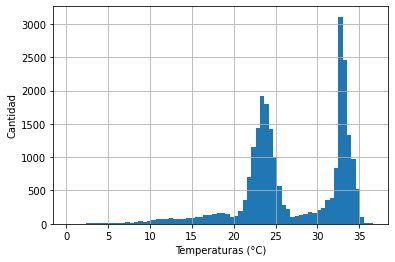

In [13]:
# Visualiza el histograma de Tmax y Tmin, todos los datos juntos 

plt.figure()
plt.hist(a,70)
plt.grid()
plt.xlabel('Temperaturas (°C)')
plt.ylabel('Cantidad')


<ipython-input-14-49a2d7736b48>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  b = np.concatenate([np.int64(Ntiempo.week),np.int64(Ntiempo.week)])


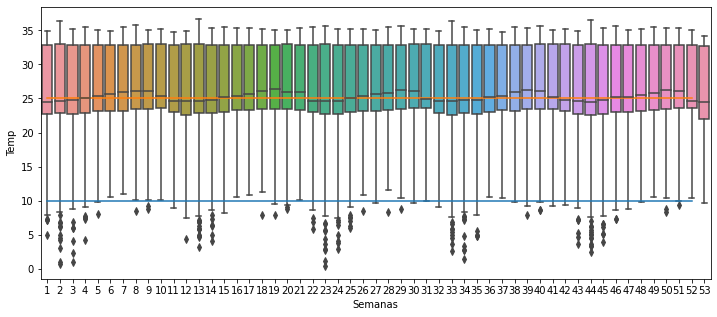

In [14]:
# Visualiza el diagrama de cajas de la Tmax y Tmin juntos x semana
a = np.concatenate([STmaxd_data,STmind_data])
b = np.concatenate([np.int64(Ntiempo.week),np.int64(Ntiempo.week)])

dTemp = pd.DataFrame({'Temp': a,
                   'Semanas': b})
#dTmin = pd.DataFrame({'Tmin': STmind_data,
#                   'Meses': np.int64(Ntiempo.month)})
#print(dTemp)
plt.figure(figsize=(12,5))
sns.boxplot(y='Temp', x='Semanas', data=dTemp)
plt.plot(10*np.ones(52))
plt.plot(25*np.ones(52))


# **Evaluación de riesgo**
BOOK CHAPTER

Chapter 2: Multi-hazard risk assessment and decision making 
By Cees J. van Westen ;  Stefan Greiving

DOI: https://doi.org/10.2166/9781780407135_0031

Published: February 2017


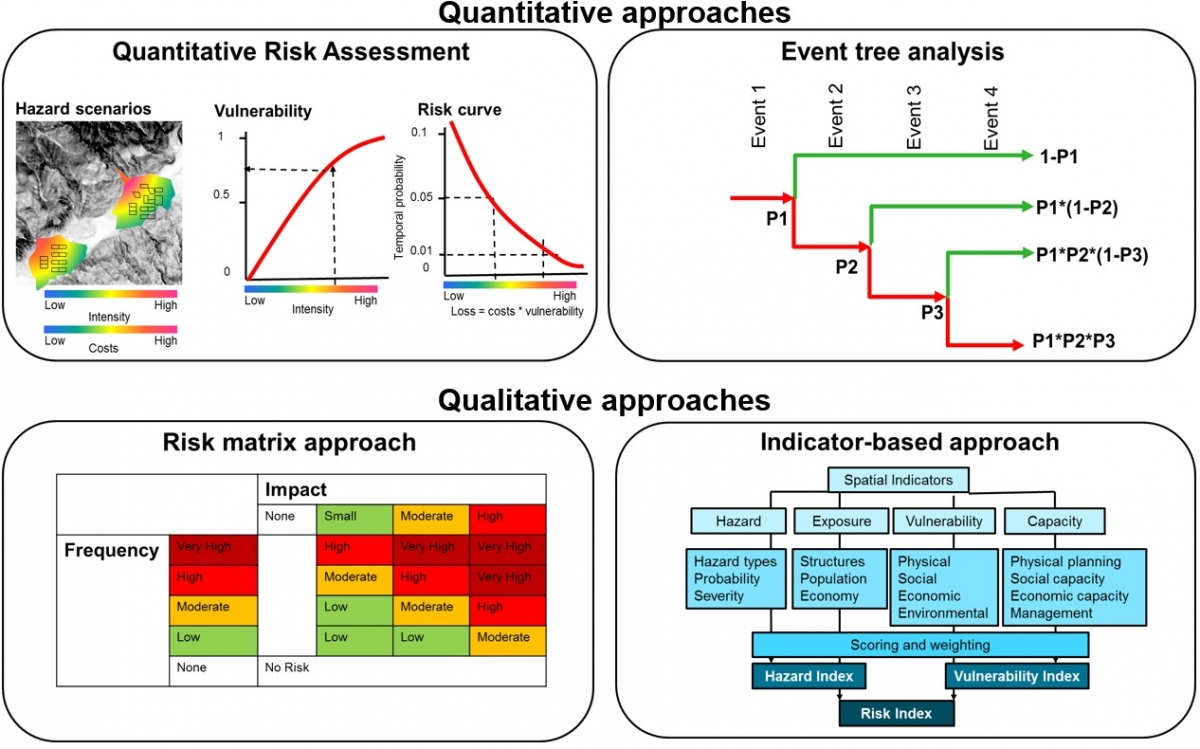
